In [1]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
## read in spotted lanternfly dataset 
spotted_lanternfly = Table.read_table("spotted_lanternfly.csv")
spotted_lanternfly.show()

Environment,Spotted Lanternfly Observed
Urban,55
Urban,120
Urban,105
Urban,196
Urban,244
Urban,117
Urban,194
Urban,230
Urban,165
Urban,61


In [3]:
## how many locations in each of the environment
spotted_lanternfly.group("Environment")

Environment,count
Rural,85
Urban,45


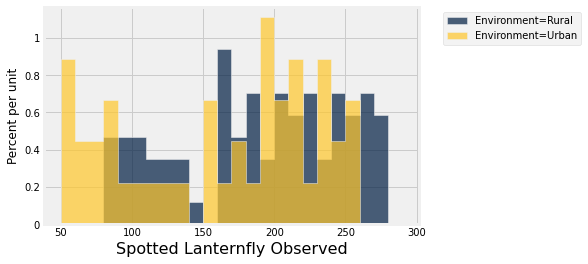

In [4]:
## draw histogram
spotted_lanternfly.hist('Spotted Lanternfly Observed', group = 'Environment', bins = np.arange(50, 300, 10) )

In [5]:
## create table with average number of observed lanternflies
table_of_means = spotted_lanternfly.group('Environment', np.average)
table_of_means

Environment,Spotted Lanternfly Observed average
Rural,190.165
Urban,162.467


In [6]:
## extract the difference in means
mean_column = table_of_means.column("Spotted Lanternfly Observed average")
observed_difference = mean_column.item(0) - mean_column.item(1)
observed_difference

27.698039215686265

In [7]:
#### Shuffle all the values
slf_obs = spotted_lanternfly.select('Spotted Lanternfly Observed')
shuffled_obs = slf_obs.sample(with_replacement = False).column(0)
shuffled_obs

array([239, 259, 184,  93, 223, 257, 247, 224, 214, 267, 133, 155, 194,
       173, 131, 267, 172, 102, 217, 247, 171, 231, 105, 273, 162,  61,
       164, 235,  52,  81, 237, 254,  92, 274,  77, 154, 269, 167, 164,
       181, 119, 234, 246, 187,  51, 165, 213, 246, 196,  85, 209, 225,
       244, 129, 225, 120, 187, 230, 251, 255, 270, 262, 209, 210, 185,
       272,  81, 195, 212, 122, 199, 272, 200, 198, 176, 252, 176, 229,
        87,  82, 163, 106, 264, 140, 263,  92, 105, 118, 205,  82, 112,
       192, 210, 186, 194, 209, 176,  62, 245,  85, 256, 212, 201, 127,
       164, 187, 225, 164, 117,  95,  51, 207,  55, 218, 150,  93, 259,
       205, 249, 222, 131, 160, 210, 207, 108,  76, 237, 195, 245, 132])

In [8]:
### assign some of these values to group A and the rest of group B (using same sample sizes)
add_shuffled = spotted_lanternfly.with_column('Shuffled Observations', shuffled_obs)
add_shuffled

Environment,Spotted Lanternfly Observed,Shuffled Observations
Urban,55,239
Urban,120,259
Urban,105,184
Urban,196,93
Urban,244,223
Urban,117,257
Urban,194,247
Urban,230,224
Urban,165,214
Urban,61,267


In [9]:
### find the difference between the averages of two shuffled groups
single_mean_table = add_shuffled.group("Environment", np.average)
single_mean_table

Environment,Spotted Lanternfly Observed average,Shuffled Observations average
Rural,190.165,179.247
Urban,162.467,183.089


In [10]:
single_mean_table.column(2).item(0) - single_mean_table.column(2).item(1)

-3.8418300653594883

In [ ]:
### SIMULATION

In [16]:
differences = make_array()
reps = 5000

for i in np.arange(reps):
    ### STEP 1: array of shuffled observations
    shuffled_obs = slf_obs.sample(with_replacement = False).column(0)
    
    ### STEP 2: assign to either group 
    add_shuffled = Table().with_columns('Environment', spotted_lanternfly.column(0), 'Shuffled Observations', shuffled_obs)

    ### STEP 3: find difference between means
    mean_table = add_shuffled.group("Environment", np.average)
    simulated_diff = mean_table.column(1).item(0) - mean_table.column(1).item(1)
    
    ## STEP 4: repeat
    differences = np.append(differences, simulated_diff)


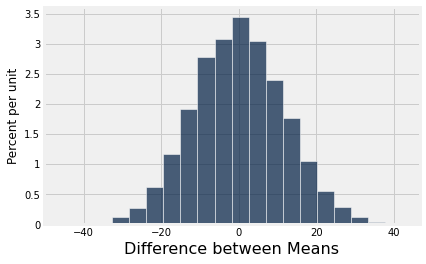

In [17]:
## STEP 5: draw a histogram
Table().with_column('Difference between Means', differences).hist(bins = 20, ec = 'w')

In [18]:
observed_difference

27.698039215686265

In [19]:
np.count_nonzero(differences >= observed_difference) / reps 

0.0098